In [10]:
#import all the necessary libraries
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [51]:
df_main=pd.read_csv("amazon_prime_data.csv") #read the csv file into pandas data frame

In [53]:
df_main.head(10)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8754.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112548.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19290.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315889.0,"AD, AT, CU, DE, IN, JP, SN"
5,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473046.0,"AD, CA, ES, IN, JP"
6,Dancer in the Dark,movie,"Crime, Drama, Musical",2000.0,tt0168629,7.9,118590.0,"DK, FI, NO, SE"
7,The Dark,movie,"Drama, Fantasy, Horror",2005.0,tt0411267,5.3,11541.0,"CA, US"
8,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189498.0,"DK, IT, NO, SE, SM, VA"
9,My Life Without Me,movie,"Drama, Romance",2003.0,tt0314412,7.4,26029.0,"GB, GG"


In [55]:
print(df_main.columns) #see the columns

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')


In [57]:
df_main.drop(["imdbId"], axis=1, inplace=True)  #dropping the imdbId columns as it is not relevant

In [71]:
df_main.head(3)

,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
title,,,,,,
Blondie,movie,"Comedy, Family",1938.0,6.9,886.0,"US, ZA"
Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,8754.0,JP
Four Rooms,movie,Comedy,1995.0,6.7,112548.0,"AT, DE"


In [73]:
df_main.index.name=None

In [75]:
df_main.head(5)

,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
Blondie,movie,"Comedy, Family",1938.0,6.9,886.0,"US, ZA"
Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,8754.0,JP
Four Rooms,movie,Comedy,1995.0,6.7,112548.0,"AT, DE"
Judgment Night,movie,"Action, Crime, Drama",1993.0,6.6,19290.0,US
Forrest Gump,movie,"Drama, Romance",1994.0,8.8,2315889.0,"AD, AT, CU, DE, IN, JP, SN"


In [77]:
headers=["Type", "Genres", "Release Year", "Average Rating", "Num Votes", "Available Countries"]
df_main.columns=headers
df_main.head(5)

,Type,Genres,Release Year,Average Rating,Num Votes,Available Countries
Blondie,movie,"Comedy, Family",1938.0,6.9,886.0,"US, ZA"
Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,8754.0,JP
Four Rooms,movie,Comedy,1995.0,6.7,112548.0,"AT, DE"
Judgment Night,movie,"Action, Crime, Drama",1993.0,6.6,19290.0,US
Forrest Gump,movie,"Drama, Romance",1994.0,8.8,2315889.0,"AD, AT, CU, DE, IN, JP, SN"


In [108]:
missing_data=df_main.isnull()
missing_data.head(5)

,Type,Genres,Release Year,Average Rating,Num Votes,Available Countries
Blondie,False,False,False,False,False,False
Ariel,False,False,False,False,False,False
Four Rooms,False,False,False,False,False,False
Judgment Night,False,False,False,False,False,False
Forrest Gump,False,False,False,False,False,False


In [95]:
print(df_main.isnull().sum())  #counting the missing values in each column

Type                      0
Genres                 1811
Release Year            168
Average Rating         7741
Num Votes              7741
Available Countries       0
dtype: int64


In [102]:
print(df_main["Average Rating"].dtype)

float64


In [123]:
mean_rating=df_main["Average Rating"].astype("float").mean(axis=0)
print("mean_rating", mean_rating)

mean_rating 5.949669477234402


In [125]:
df_main["Average Rating"].replace(np.nan, mean_rating, inplace=True)
print(df_main["Average Rating"].isnull().sum())

0


In [127]:
mean_num_votes=df_main["Num Votes"].astype(float).mean(axis=0)
print(mean_num_votes)

13562.86586846543


In [129]:
df_main["Num Votes"].replace(np.nan, mean_num_votes, inplace=True)
print(df_main["Num Votes"].isnull().sum())

0


C:\Users\basur\AppData\Local\Temp\ipykernel_17404\539529140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main["Num Votes"].replace(np.nan, mean_num_votes, inplace=True)


In [131]:
#we build a regression plot on number of votes and available countries
lm=LinearRegression()
lm

LinearRegression()

In [186]:
x=df_main[["Num Votes"]]
y=df_main["Average Rating"]
lm.fit(x,y)
y_hat=lm.predict(x)
#y_hat[0:5]
m=lm.coef_
b=lm.intercept_
print("intercept:", b, "slope:", m)
print(df_main[["Num Votes", "Average Rating"]].corr())

intercept: 5.949669477234402 slope: [3.88243845e-37]
                Num Votes  Average Rating
Num Votes             1.0             NaN
Average Rating        NaN             NaN


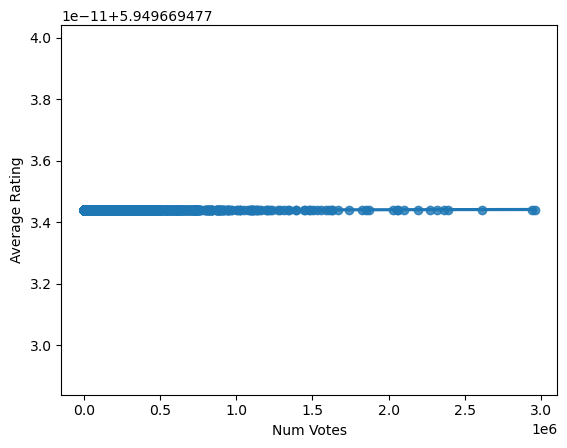

In [155]:
sns.regplot(x=df_main["Num Votes"], y=df_main["Average Rating"], data=df_main)
plt.show()

The graph shows no or weak correlation between number of votes with average rating.

In [182]:
df_main["Release Year"]=df_main["Release Year"].astype(float)
print(df_main["Release Year"].dtype)
df_main["Release Year"].fillna(0)
print(df_main["Release Year"].isnull().sum())

float64
0
